<a href="https://colab.research.google.com/github/Dany511/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Email Campaign Effectiveness Prediction </u></b>

## <b> Problem Description </b>

### Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business.The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.


## <b> Introduction </b>

### Email marketing is a type of direct marketing that uses personalized emails to educate your email list about your product or services. An email marketing campaign is a scheduled series of emails used to nurture leads and current customers with the purpose of encouraging engagement and increasing sales. Each individual email leads to a specific call-to-action, i.e. getting users to sign up, book a call, continue reading, or add a product to their cart.

### Email marketing involves segmenting your target audience based on their likes and preferences to share personalized content with them. This makes them feel valued and important through personalized subject content like subject lines. Through email marketing, you will be able to increase your conversion rate. Over 65% of email users have shared that they have made a purchase through email through their phones or desktop as they found that the message was compelling. 

### In this problem statement, we will be trying to create machine learning models that characterize and track whether the mail is ignored, read or acknowledged by the reader.

### So let's begin!

## **Import Libraries**

In [1]:
#Importing all the necessary libraries
import pandas as pd 
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing VIF(variance infalation factor) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing train_test_split for splitting the data
from sklearn.model_selection import train_test_split

# Importing Grid Search and Randomized search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Importing Metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score,f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

## **Load the Dataset**

In [2]:
# Loading the dataset using pandas read_csv.
data=pd.read_csv("/content/data_email_campaign.csv")
# .head() function gives the preview of the data
data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [3]:
# Data shape
data.shape

(68353, 12)

In [4]:
# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


### There are 5 Numerical and 6 Categorical variables in the dataset

In [5]:
# Copying the dataset to a dataframe named df.
df=data.copy()

In [6]:
# Dropping the 'Email_ID' column because it is not useful in model building
df=df.drop("Email_ID",axis=1)

In [7]:
# Descriptive summary of the dataset
df.describe(include='all')

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


# **EDA**

### Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

## **Data Cleaning**

## Check for Null values

### A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [8]:
# Checking for Null values in the dataframe
df.isnull().sum()

Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

### We have Null values present in these columns 
### • Customer_Location
### • Total_Past_Communications
### • Total_Links
### • Total_Images

## **Univariate Analysis**

### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

In [9]:
# Create a list of all the numerical features in the dataset.
numerical_columns=["Word_Count","Total_Past_Communications","Total_Links","Total_Images","Subject_Hotness_Score"]

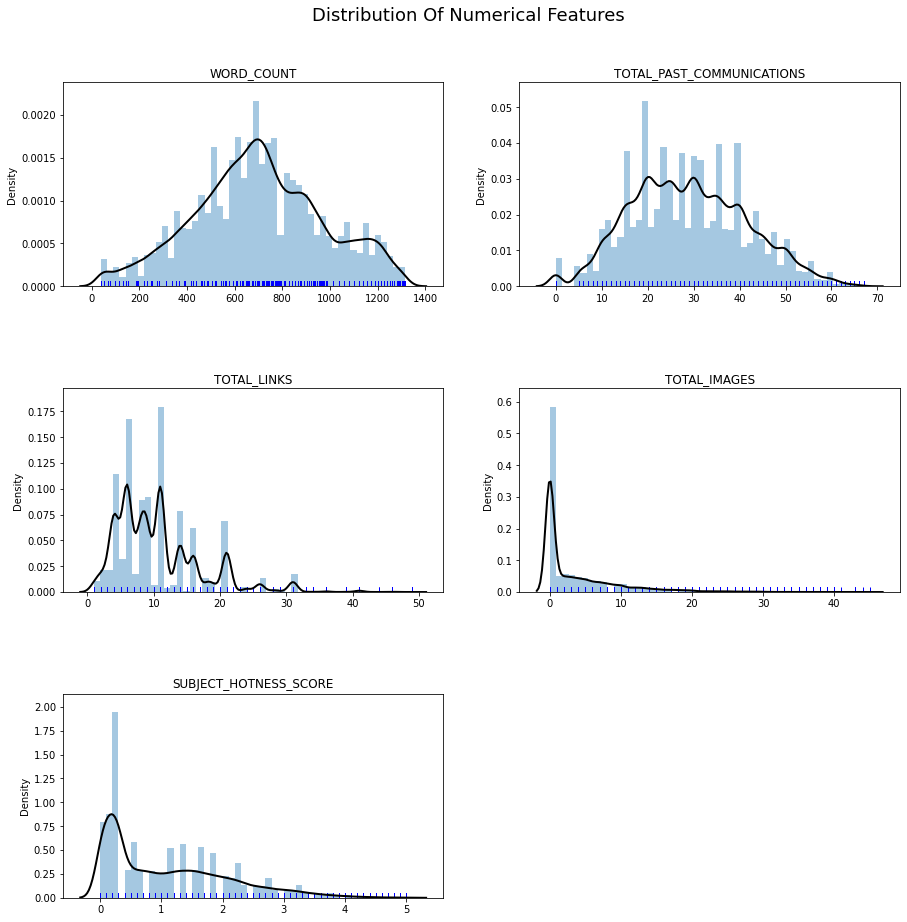

In [10]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
axs[2][1].set_visible(False) # Ignore the last subplot beacause we dont need it
fig.suptitle("Distribution Of Numerical Features", fontsize=18, y=0.95) # Define a title to the plot

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.distplot(x=df[col],ax=ax,rug=True, rug_kws={"color": "b"},kde_kws={"color": "k", "lw": 2, "label": "KDE"})

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

### We observe that the distribution of Total_Past_Communications and Word_Count follows Normal distribution. So it is fine to the use mean to fill up the Null values in 'Total_Past_Communications' column.

### Rest of the features were highly skewed on the right. Mode is robust to outliers so we use mode to fill up the missing values in Total_Links and Total_Images columns. 

## **Imputing Missing Values**

In [11]:
# Filling the null values with the mean of the column
df['Total_Past_Communications']=df["Total_Past_Communications"].fillna(df['Total_Past_Communications'].mean())

In [12]:
# Filling the null values with the mode of the column 
df['Total_Links']=df["Total_Links"].fillna(df['Total_Links'].mode()[0])
df['Total_Images']=df["Total_Images"].fillna(df['Total_Images'].mode()[0])

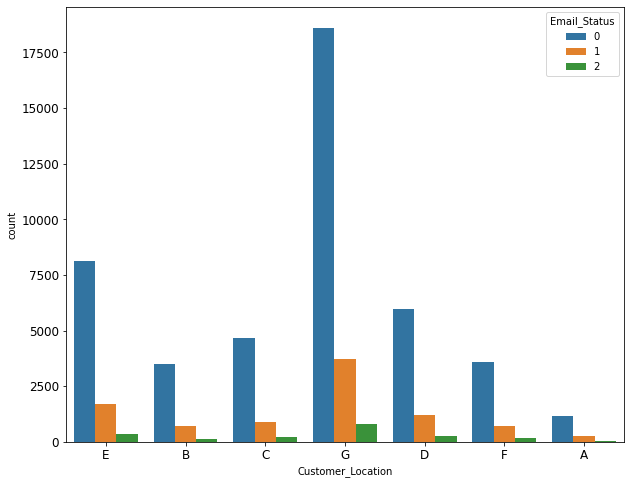

In [13]:
# Plot of frequency of Email status per each customer locatiion 
plt.figure(figsize=(10,8)) # define figure size
plt.ylabel("Frequency of Email Status")
ax=sns.countplot(df['Customer_Location'],hue=df['Email_Status']) # Using seaborn's countplot for visualization
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


### After observing the frequency graph of different values of  Customer_location with respect to the Email_status category, we found that the customer location has nothing to do with Email_Status. we came to a conclusion that the email being Ignored, Read or Acknowledged is the same irrespective of the location.

### So we drop Customer_Location feature

In [14]:
# Dropping the Customer_Location column
df=df.drop('Customer_Location',axis=1)

## **Correlation Heat Map**

### Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

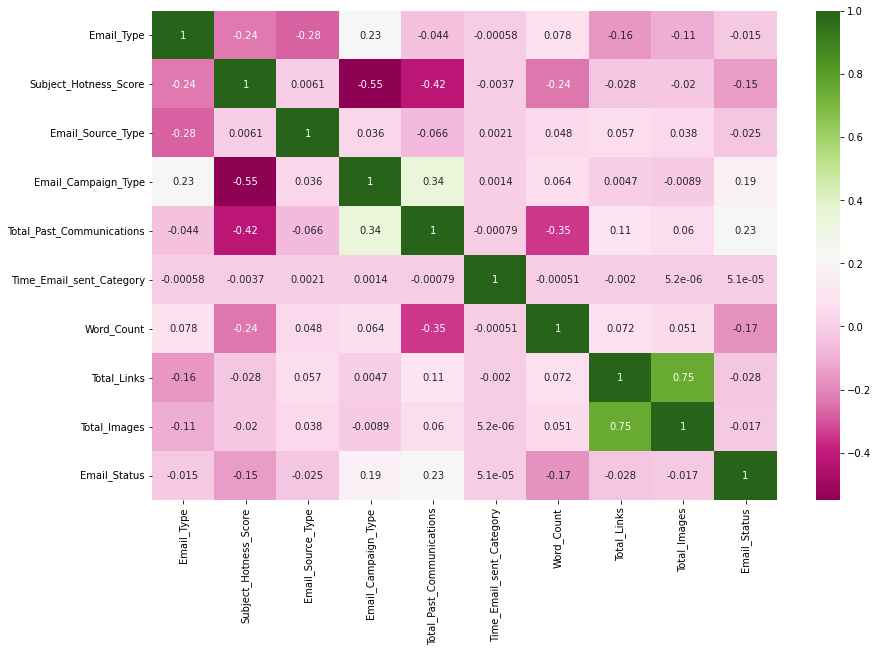

In [15]:
#Correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='PiYG', annot=True) # using seaborn's heatmap for visualization
plt.show()